# Shallow neural network implemented in Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

## Neural network algorithm

In [2]:
class NeuralNet():
    
    
    def __init__(self, n_input, n_output, n_hidden):
        self.n_input = n_input
        self.n_output = n_output
        self.n_hidden = n_hidden
        
        # Initialization
        self.W_h = np.random.randn(self.n_input, self.n_hidden)
        self.b_h = np.zeros((1, self.n_hidden))
        self.W_o = np.random.randn(self.n_hidden, self.n_output)
        self.b_o = np.zeros((1, self.n_output))
        
    
    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))
    
    
    def forward_pass(self, X):
        A_h = np.dot(X, self.W_h) + self.b_h
        O_h = np.tanh(A_h)  # Use tanh as the activation
        
        A_o = np.dot(O_h, self.W_o) + self.b_o
        O_o = self.sigmoid(A_o)
        
        output = {
            "A_h": A_h,
            "A_o": A_o,
            "O_h": O_h,
            "O_o": O_o,
        }
        
        return output
    
    
    def cost(self, y_true, y_predict, n_sample):
        # Use cross-entropy as the loss function
        cost = (-1/n_sample) * np.sum(y_true*np.log(y_predict) + (1-y_true)*np.log(1-y_predict))
        cost = np.squeeze(cost)
        assert isinstance(cost, float)
        return cost
    
    
    def backward_pass(self, X, Y, n_sample, output):
        dA_o = output["O_o"] - Y
        dW_o = (1/n_sample) * np.dot(output["O_h"].T, dA_o)
        db_o = (1/n_sample) * np.sum(dA_o)
        
        dA_h = (np.dot(dA_o, self.W_o.T)) * (1-np.power(output["O_h"], 2))
        dW_h = (1/n_sample) * np.dot(X.T, dA_h)
        db_h = (1/n_sample) * np.sum(dA_h)
        
        gradient = {
            "dW_o": dW_o,
            "db_o": db_o,
            "dW_h": dW_h,
            "db_h": db_h,
        }
        
        return gradient
    
    
    def update_weight(self, gradient, eta):
        self.W_o = self.W_o - eta * gradient["dW_o"]
        self.W_h = self.W_h - eta * gradient["dW_h"]
        self.b_o = self.b_o - eta * gradient["db_o"]
        self.b_h = self.b_h - eta * gradient["db_h"]
    
    
    def train(self, X, y, epoch, eta):
        n_sample = X.shape[0]
        
        for i in range(epoch):
            output = self.forward_pass(X)
            cost = self.cost(y, output["O_o"], n_sample=n_sample)
            gradient = self.backward_pass(X, y, n_sample, output)
            
            if i % 50 == 0:
                print(f"Cost at epoch {i}: {np.round(cost, 4)}")
            
            self.update_weight(gradient, eta)
    
    
    def predict(self, X):
        output = self.forward_pass(X)
        y_pred = [1 if elem >= 0.5 else 0 for elem in output["O_o"]]
        return np.array(y_pred)[:, np.newaxis]
        

## Dataset

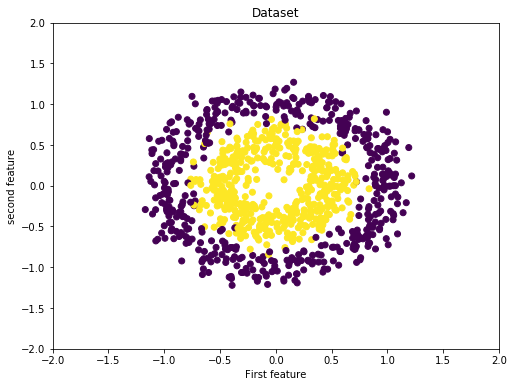

In [3]:
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.125)

fig = plt.figure(figsize = (8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("second feature")
plt.show()

In [4]:
y_true = y[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (750, 2)
Shape of X_test: (250, 2)
Shape of y_train: (750, 1)
Shape of y_test: (250, 1)


## Training and testing

In [5]:
nn = NeuralNet(n_input=2, n_hidden=5, n_output=1)

print("Shape of weight matrices and bias vectors:")
print(f"W_h shape: {nn.W_h.shape}")
print(f"b_h shape: {nn.b_h.shape}")
print(f"W_o shape: {nn.W_o.shape}")
print(f"b_o shape: {nn.b_o.shape}")
print()

print("Training...")
nn.train(X_train, y_train, epoch = 2000, eta = 0.5)

Shape of weight matrices and bias vectors:
W_h shape: (2, 5)
b_h shape: (1, 5)
W_o shape: (5, 1)
b_o shape: (1, 1)

Training...
Cost at epoch 0: 0.9846
Cost at epoch 50: 0.5711
Cost at epoch 100: 0.482
Cost at epoch 150: 0.3807
Cost at epoch 200: 0.2851
Cost at epoch 250: 0.2423
Cost at epoch 300: 0.2179
Cost at epoch 350: 0.2017
Cost at epoch 400: 0.1898
Cost at epoch 450: 0.1805
Cost at epoch 500: 0.1729
Cost at epoch 550: 0.1665
Cost at epoch 600: 0.161
Cost at epoch 650: 0.1562
Cost at epoch 700: 0.1519
Cost at epoch 750: 0.1482
Cost at epoch 800: 0.1448
Cost at epoch 850: 0.1417
Cost at epoch 900: 0.1389
Cost at epoch 950: 0.1364
Cost at epoch 1000: 0.134
Cost at epoch 1050: 0.1318
Cost at epoch 1100: 0.1298
Cost at epoch 1150: 0.1279
Cost at epoch 1200: 0.1262
Cost at epoch 1250: 0.1245
Cost at epoch 1300: 0.123
Cost at epoch 1350: 0.1215
Cost at epoch 1400: 0.1201
Cost at epoch 1450: 0.1188
Cost at epoch 1500: 0.1176
Cost at epoch 1550: 0.1164
Cost at epoch 1600: 0.1153
Cost at 

In [6]:
n_test_sample = X_test.shape[0]

y_predict = nn.predict(X_test)

print(f"Classfication accuracy on test set: {(np.sum(y_predict == y_test)/n_test_sample)*100}%")

Classfication accuracy on test set: 94.39999999999999%


## Visualize the decision boundary

In [7]:
X_new, y_new = make_circles(n_samples=20000, noise=0.5)

y_new_predict = nn.predict(X_new)
y_new_predict = np.ravel(y_new_predict)

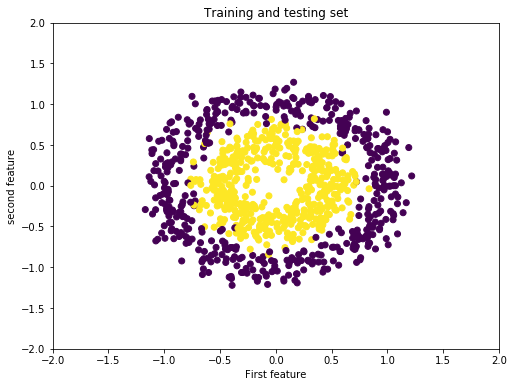

In [8]:
fig = plt.figure(figsize = (8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title("Training and testing set")
plt.xlabel("First feature")
plt.ylabel("second feature")
plt.show()

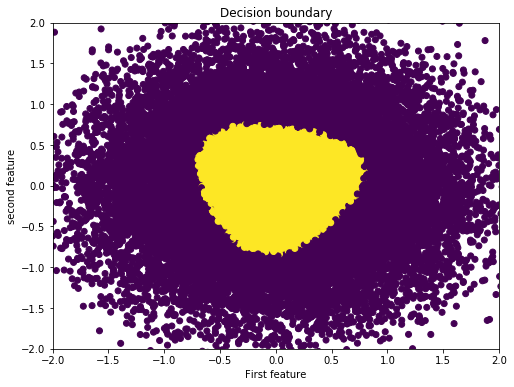

In [9]:
fig = plt.figure(figsize = (8, 6))
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new_predict)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title("Decision boundary")
plt.xlabel("First feature")
plt.ylabel("second feature")
plt.show()